In [1]:
import pandas as pd
import glob

# CICIDS2017 veri setindeki tüm CSV dosyalarının yolunu listeleyin
csv_files = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",  # Dosya yollarını buraya ekleyin
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv"
]

# Ortak veri setini tutmak için boş bir liste oluşturun
data_frames = []

# Her CSV dosyasından 100.000 satır çekin
for file in csv_files:
    print(f"Reading file: {file}")
    df = pd.read_csv(file)  # CSV dosyasını okuyun
    df_sample = df.sample(n=100000, random_state=42)  # 100.000 rastgele satır seçin
    data_frames.append(df_sample)  # Listeye ekleyin
    
# Tüm veri çerçevelerini birleştirin
combined_data = pd.concat(data_frames, ignore_index=True)
df_new=pd.DataFrame(combined_data)
# Birleştirilmiş veri setini bir CSV dosyasına kaydedin
df_new.to_csv("combined_dataset.csv", index=False)
print("Birleştirilmiş veri seti kaydedildi: combined_dataset.csv")


Reading file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Reading file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Reading file: Friday-WorkingHours-Morning.pcap_ISCX.csv
Reading file: Monday-WorkingHours.pcap_ISCX.csv
Reading file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Reading file: Tuesday-WorkingHours.pcap_ISCX.csv
Reading file: Wednesday-workingHours.pcap_ISCX.csv
Birleştirilmiş veri seti kaydedildi: combined_dataset.csv


In [2]:
# Veri setindeki eksik değerleri kontrol et
print("Eksik Değer Kontrolü:")
print(combined_data.isnull().sum())

# Veri türlerini kontrol et
print("\nVeri Türleri:")
print(combined_data.dtypes)

# Kategorik ve sayısal sütunları belirle
categorical_columns = combined_data.select_dtypes(include=['object']).columns
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik Sütunlar:", categorical_columns)
print("Sayısal Sütunlar:", numeric_columns)


Eksik Değer Kontrolü:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

Veri Türleri:
 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

Kategorik Sütunlar: Index([' Label'], dtype='object')
Sayısal Sütunlar: Index([' Destination Port', ' Flow Duration', '

In [3]:
# Kategorik ve sayısal sütunları kontrol et

categorical_columns = combined_data.select_dtypes(include=['object']).columns
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik Sütunlar:", list(categorical_columns))

# Sayısal sütunları satır satır yazdır
print("\nSayısal Sütunlar:")
print("\n".join(list(numeric_columns)))




Kategorik Sütunlar: [' Label']

Sayısal Sütunlar:
 Destination Port
 Flow Duration
 Total Fwd Packets
 Total Backward Packets
Total Length of Fwd Packets
 Total Length of Bwd Packets
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Fwd Packet Length Std
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
 Bwd Packet Length Std
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Std
 Flow IAT Max
 Flow IAT Min
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Fwd IAT Min
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Std
 Bwd IAT Max
 Bwd IAT Min
Fwd PSH Flags
 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Bwd Packets/s
 Min Packet Length
 Max Packet Length
 Packet Length Mean
 Packet Length Std
 Packet Length Variance
FIN Flag Count
 SYN Flag Count
 RST Flag Count
 PSH Flag Count
 ACK Flag Count
 URG Flag Count
 CWE Flag Count
 ECE Flag Count
 Down/Up Ratio
 Average Packet Size
 Avg Fwd Segment Size

In [4]:
# Tamamen eksik olan sütunu veri setinden çıkarma
combined_data = combined_data.drop(columns=['Total Length of Fwd Packets'])

print("Güncellenmiş veri seti sütunları:")
print(combined_data.columns)


Güncellenmiş veri seti sütunları:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
     

In [5]:
# Veri setindeki eksik değerleri kontrol et
print("Eksik Değer Kontrolü:")
print(combined_data.isnull().sum())

Eksik Değer Kontrolü:
 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
 Total Length of Bwd Packets    0
                               ..
Idle Mean                       0
 Idle Std                       0
 Idle Max                       0
 Idle Min                       0
 Label                          0
Length: 78, dtype: int64


In [6]:
# Kategorik ve sayısal sütunları kontrol et
categorical_columns = combined_data.select_dtypes(include=['object']).columns
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik Sütunlar:", list(categorical_columns))
print("\nSayısal Sütunlar:", list(numeric_columns))



Kategorik Sütunlar: [' Label']

Sayısal Sütunlar: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag

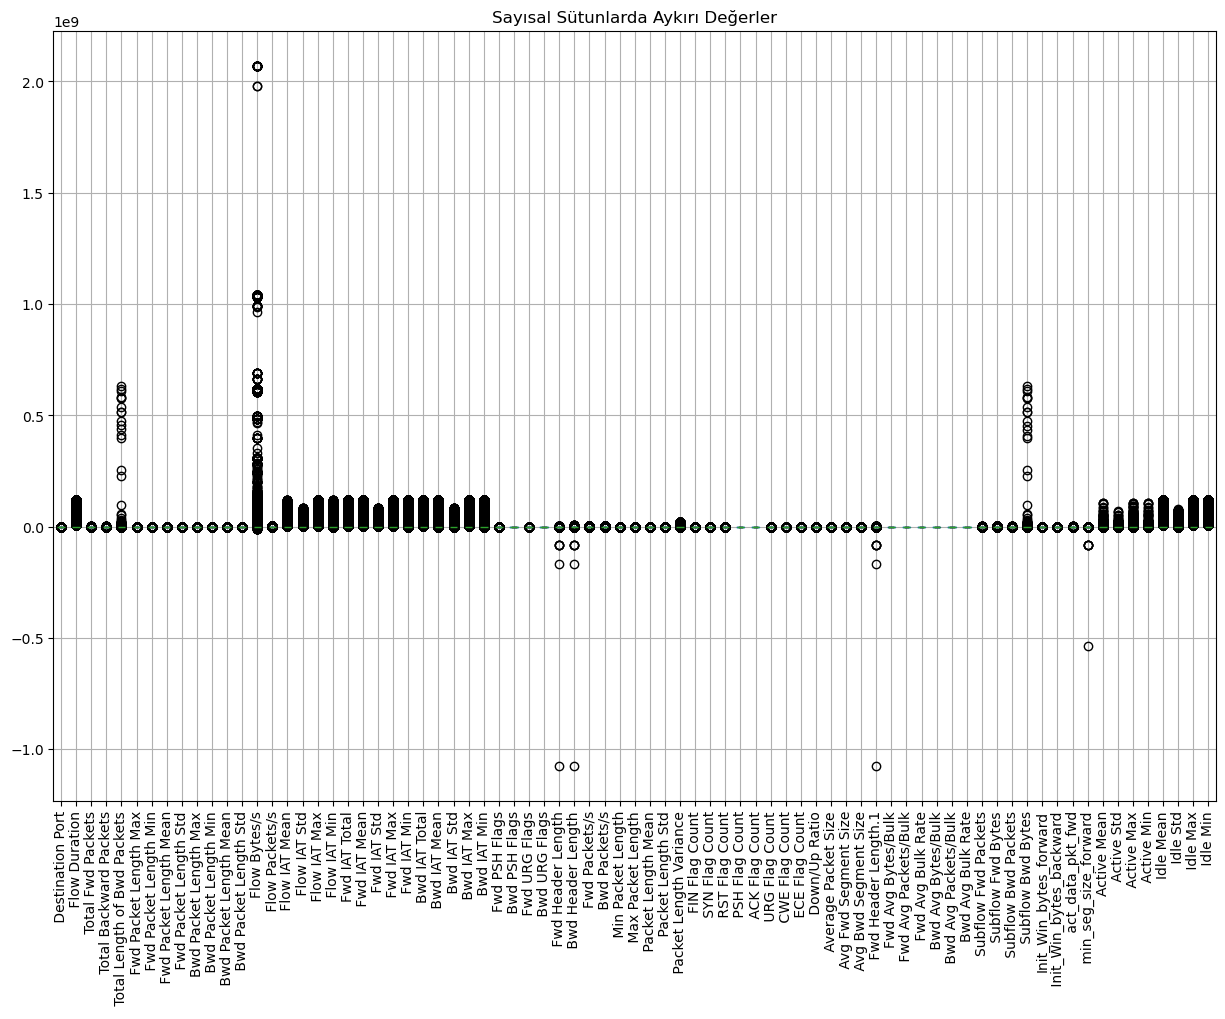

In [7]:
import matplotlib.pyplot as plt

# Boxplot ile sayısal sütunların dağılımını görselleştir
plt.figure(figsize=(15, 10))  # Grafiğin boyutunu ayarla
combined_data[numeric_columns].boxplot(rot=90)  # Tüm sayısal sütunların boxplot'unu oluştur
plt.title("Sayısal Sütunlarda Aykırı Değerler")  # Başlık ekle
plt.show()  # Grafiği göster



In [8]:
print(combined_data[[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets']].describe())



        Destination Port   Flow Duration   Total Fwd Packets  \
count      700000.000000    7.000000e+05       700000.000000   
mean         8155.210620    1.304353e+07            9.672379   
std         18178.854775    3.168583e+07          816.274632   
min             0.000000   -1.200000e+01            1.000000   
25%            53.000000    1.340000e+02            1.000000   
50%            80.000000    3.115000e+04            2.000000   
75%           992.000000    1.887940e+06            4.000000   
max         65534.000000    1.200000e+08       214125.000000   

        Total Backward Packets  
count            700000.000000  
mean                 10.978603  
std                1093.569773  
min                   0.000000  
25%                   1.000000  
50%                   2.000000  
75%                   4.000000  
max              283900.000000  


In [9]:
# Her sütun için aykırı değerlerin sınıf dağılımını kontrol et
for col in numeric_columns:
    # Sütundaki aykırı değerleri filtrele
    Q1 = combined_data[col].quantile(0.25)
    Q3 = combined_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # Alt sınır (negatif olmamalı)
    upper_limit = Q3 + 1.5 * IQR  # Üst sınır
    
    # Aykırı değerler
    outliers = combined_data[(combined_data[col] < lower_limit) | 
                             (combined_data[col] > upper_limit)]
        
    # Aykırı değerlerin sınıf dağılımı
    class_distribution = outliers[' Label'].value_counts()
    print(f"{col} sütunundaki aykırı değerlerin sınıf dağılımı:")
    print(class_distribution)
    print("\n")


 Destination Port sütunundaki aykırı değerlerin sınıf dağılımı:
 Label
BENIGN      118241
PortScan     32035
Bot            992
DDoS             1
Name: count, dtype: int64


 Flow Duration sütunundaki aykırı değerlerin sınıf dağılımı:
 Label
BENIGN              110137
DDoS                 23055
DoS Hulk             20522
DoS GoldenEye         1418
FTP-Patator            874
SSH-Patator            689
DoS Slowhttptest       638
DoS slowloris          471
PortScan               111
Infiltration            10
Bot                      2
Heartbleed               2
Name: count, dtype: int64


 Total Fwd Packets sütunundaki aykırı değerlerin sınıf dağılımı:
 Label
BENIGN              82992
DoS Hulk             3574
DDoS                 1786
FTP-Patator           874
SSH-Patator           692
DoS slowloris         259
DoS GoldenEye         199
DoS Slowhttptest       35
Bot                    26
Infiltration            8
Heartbleed              2
PortScan                1
Name: count, dtype: i

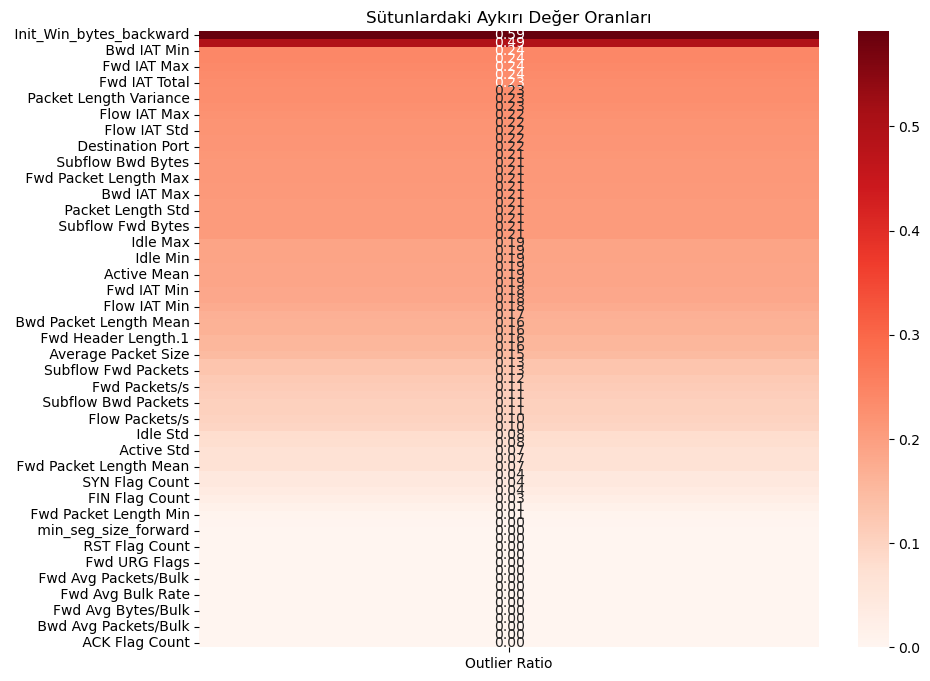

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Aykırı değer oranlarını hesapla
outlier_ratios = {}
for col in numeric_columns:
    Q1 = combined_data[col].quantile(0.25)
    Q3 = combined_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)
    upper_limit = Q3 + 1.5 * IQR
    outliers = combined_data[(combined_data[col] < lower_limit) | (combined_data[col] > upper_limit)]
    outlier_ratios[col] = len(outliers) / len(combined_data)

# Isı haritası için veri çerçevesi oluştur
outlier_df = pd.DataFrame.from_dict(outlier_ratios, orient='index', columns=['Outlier Ratio'])
outlier_df.sort_values(by='Outlier Ratio', ascending=False, inplace=True)

# Isı haritasını çiz
plt.figure(figsize=(10, 8))
sns.heatmap(outlier_df, annot=True, cmap="Reds", cbar=True, fmt=".2f")
plt.title("Sütunlardaki Aykırı Değer Oranları")
plt.show()




In [11]:
# Detaylı Analiz:
# En Yüksek Aykırı Değer Oranına Sahip Sütunlar:

# Haritanın üst kısmında yer alan sütunlar, en fazla aykırı değer oranına sahip olan sütunlardır.
# Bu sütunlar, modelin saldırı davranışlarını tespit etmesinde kritik rol oynayabilir.
# Özellikle Init_Win_bytes_backward ve Fwd IAT Max gibi sütunlar, bu tür analizlerde daha fazla dikkate alınmalıdır.
# En Düşük Aykırı Değer Oranına Sahip Sütunlar:

# Haritanın alt kısmında yer alan sütunlar, neredeyse hiç aykırı değer içermemektedir.
# Bu sütunlar, veri setinde model performansına sınırlı katkı sağlayabilir. Analiz sırasında bu sütunların ağırlığını düşürmek düşünülebilir.
# Kümeleşme ve Sıcaklık Dağılımı:

# Kırmızı tonlarının kümelendiği sütun grupları, saldırı davranışlarına daha duyarlı olabilir.
# Bu kümeler, modelin ağırlık vereceği anahtar özellikler olabilir.


<Figure size 1200x600 with 0 Axes>

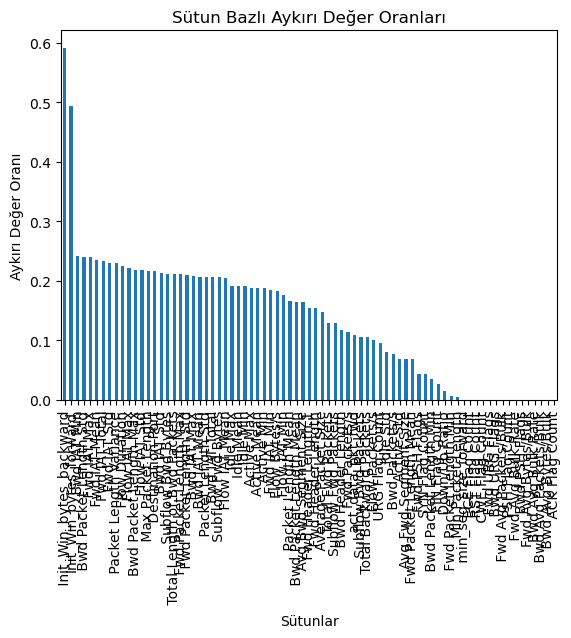

In [12]:
# Bar grafiği oluştur
plt.figure(figsize=(12, 6))
outlier_df.plot(kind='bar', legend=False)
plt.title("Sütun Bazlı Aykırı Değer Oranları")
plt.xlabel("Sütunlar")
plt.ylabel("Aykırı Değer Oranı")
plt.xticks(rotation=90)
plt.show()


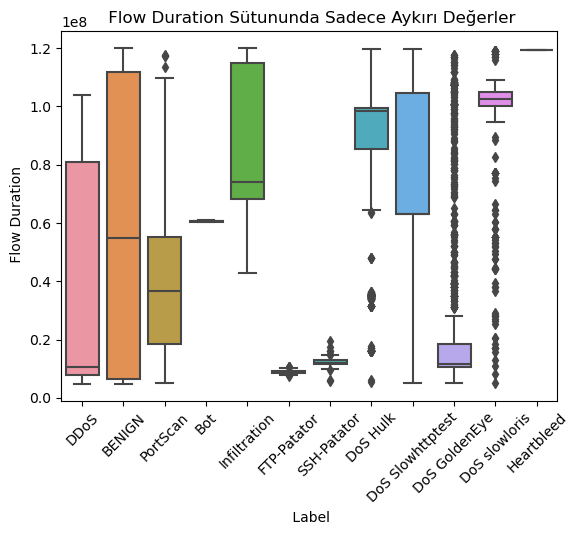

In [13]:
# Aykırı değerleri filtrele
import seaborn as sns

Q1 = combined_data[' Flow Duration'].quantile(0.25)
Q3 = combined_data[' Flow Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = combined_data[(combined_data[' Flow Duration'] < lower_limit) | 
                         (combined_data[' Flow Duration'] > upper_limit)]

sns.boxplot(x=' Label', y=' Flow Duration', data=outliers)
plt.title(" Flow Duration Sütununda Sadece Aykırı Değerler")
plt.xticks(rotation=45)
plt.show()


In [14]:
# # IQR hesaplama (Standart Q1 ve Q3 kullanımı)
# Q1 = df_new[" Total Length of Bwd Packets"].quantile(0.20)  # 1. çeyrek
# Q3 = df_new[" Total Length of Bwd Packets"].quantile(0.80)  # 3. çeyrek
# IQR_TotalLengthofBwdPackets = Q3 - Q1  # IQR hesaplama
 
# # Alt ve üst sınırların belirlenmesi
# alt_limit_TotalLengthofBwdPackets = Q1 - (1.5 * IQR_TotalLengthofBwdPackets)
# ust_limit_TotalLengthofBwdPackets = Q3 + (6.5 * IQR_TotalLengthofBwdPackets)
 
# # Alt ve üst sınırların yazdırılması
# print(f"Alt Limit: {alt_limit_TotalLengthofBwdPackets}")
# print(f"Üst Limit: {ust_limit_TotalLengthofBwdPackets}")


In [15]:
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new[" Total Length of Bwd Packets"] = df_new[" Total Length of Bwd Packets"].replace([float('inf'), float('-inf')], np.nan)
print(df_new[" Total Length of Bwd Packets"].isna().sum())

0


In [17]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Total Length of Bwd Packets"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Total Length of Bwd Packets"].quantile(0.75)  # 3. çeyrek
IQR_TotalLengthofBwdPackets = Q3 - Q1  # IQR hesaplama

# Alt ve üst sınırların belirlenmesi
alt_limit_TotalLengthofBwdPackets = max(Q1 - (1.5 * IQR_TotalLengthofBwdPackets), 0)  # Negatif olmamalı
ust_limit_TotalLengthofBwdPackets = Q3 + (3 * IQR_TotalLengthofBwdPackets)  # Üst sınır genişletildi

# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_TotalLengthofBwdPackets}")
print(f"Üst Limit: {ust_limit_TotalLengthofBwdPackets}")

# Üst sınırın üstünde kalan veri sayısı
outliers_count = (df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets).sum()
print(f"Üst sınırın üstünde kalan veri sayısı: {outliers_count}")

# Filtreleme
filtered_data = df_new[df_new[" Total Length of Bwd Packets"] <= ust_limit_TotalLengthofBwdPackets]
print(f"Filtrelenmiş veri setinin boyutu: {filtered_data.shape}")
 

Alt Limit: 0
Üst Limit: 1638.0
Üst sınırın üstünde kalan veri sayısı: 143223
Filtrelenmiş veri setinin boyutu: (556777, 79)


In [18]:
outliers_count = (df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets).sum()
print(f"Üst sınırın üstünde kalan veri sayısı: {outliers_count}")


Üst sınırın üstünde kalan veri sayısı: 143223


In [19]:
negatif_oran = (df_new[" Total Length of Bwd Packets"] < 0).mean()
print(f"Negatif değer oranı: {negatif_oran:.2%}")


Negatif değer oranı: 0.00%


In [20]:
alt_limit_TotalLengthofBwdPackets = max(alt_limit_TotalLengthofBwdPackets, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_TotalLengthofBwdPackets}")


Güncellenmiş Alt Limit: 0


In [21]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_TotalLengthofBwdPackets}")
print(f"Üst Limit: {ust_limit_TotalLengthofBwdPackets}")
 

Alt Limit: 0
Üst Limit: 1638.0


In [22]:
print(df_new[" Total Length of Bwd Packets"].mean())
print(df_new[" Total Length of Bwd Packets"].max())
print(df_new[" Total Length of Bwd Packets"].min())


17373.635357142855
629600565
0


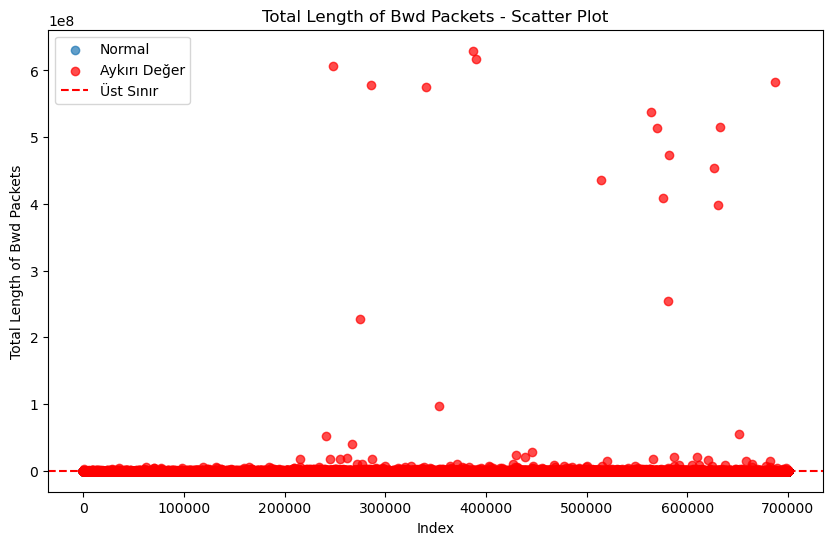

In [23]:
# Aykırı ve normal değerler için renkli scatter plot
outliers = df_new[df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets]
normal_values = df_new[df_new[" Total Length of Bwd Packets"] <= ust_limit_TotalLengthofBwdPackets]

plt.figure(figsize=(10, 6))
plt.scatter(normal_values.index, normal_values[" Total Length of Bwd Packets"], label="Normal", alpha=0.7)
plt.scatter(outliers.index, outliers[" Total Length of Bwd Packets"], color='r', label="Aykırı Değer", alpha=0.7)
plt.axhline(y=ust_limit_TotalLengthofBwdPackets, color='r', linestyle='--', label='Üst Sınır')
plt.title("Total Length of Bwd Packets - Scatter Plot")
plt.xlabel("Index")
plt.ylabel("Total Length of Bwd Packets")
plt.legend()
plt.show()


In [24]:
#Flow Bytes/s, bir ağ trafiği akışında birim zamanda geçen bayt miktarını ifade eder.
# Bu, ağ performansını ve bant genişliği kullanımını analiz etmek için önemli bir metriktir.
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new["Flow Bytes/s"] = df_new["Flow Bytes/s"].replace([float('inf'), float('-inf')], np.nan)
print(df_new["Flow Bytes/s"].isna().sum())

599


In [25]:
df_new["Flow Bytes/s"]=df_new["Flow Bytes/s"].fillna(df_new["Flow Bytes/s"].mean())
print(df_new["Flow Bytes/s"].isna().sum())

0


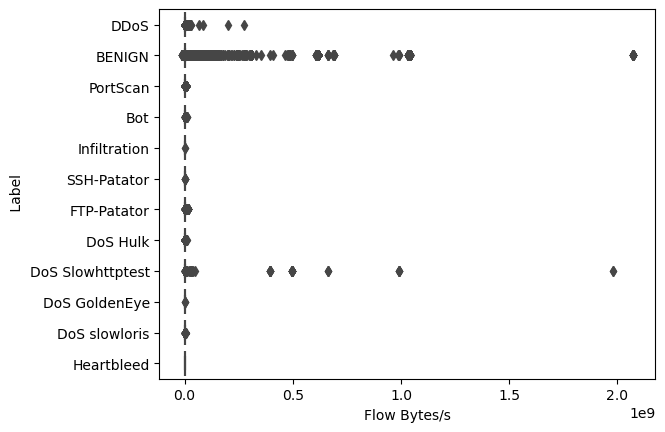

1350399.3726483085
2071000000.0


In [26]:
import seaborn as sns
sns.boxplot(x="Flow Bytes/s",y=" Label",data=df_new)
plt.show()
print(df_new["Flow Bytes/s"].mean())
print(df_new["Flow Bytes/s"].max())

In [27]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new["Flow Bytes/s"].quantile(0.20)  # 1. çeyrek
Q3 = df_new["Flow Bytes/s"].quantile(0.80)  # 3. çeyrek
IQR_FlowBytes = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_FlowBytes = Q1 - (0* IQR_FlowBytes)
ust_limit_FlowBytes = Q3 + (6 * IQR_FlowBytes)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FlowBytes}")
print(f"Üst Limit: {ust_limit_FlowBytes}")
 

Alt Limit: 43.026409688000015
Üst Limit: 2333075.174641872


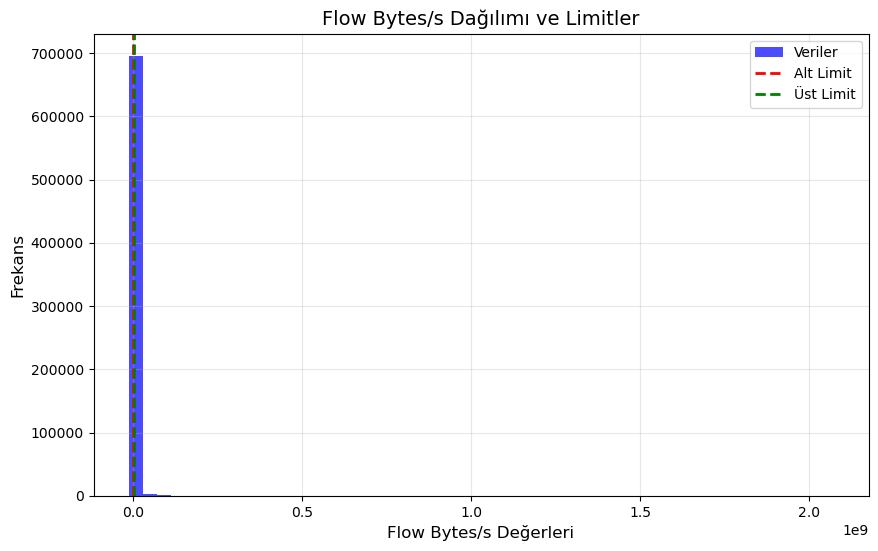

In [28]:
import matplotlib.pyplot as plt

# Veriyi ve alt/üst limitleri al
data = df_new["Flow Bytes/s"]
alt_limit = alt_limit_FlowBytes
ust_limit = ust_limit_FlowBytes

# Histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color='blue', alpha=0.7, label='Veriler')

# Alt ve üst limitleri çiz
plt.axvline(alt_limit, color='red', linestyle='--', linewidth=2, label='Alt Limit')
plt.axvline(ust_limit, color='green', linestyle='--', linewidth=2, label='Üst Limit')

# Grafik detayları
plt.title("Flow Bytes/s Dağılımı ve Limitler", fontsize=14)
plt.xlabel("Flow Bytes/s Değerleri", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Grafiği göster
plt.show()


In [29]:
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new[" Fwd Header Length"] = df_new[" Fwd Header Length"].replace([float('inf'), float('-inf')], np.nan)
print(df_new[" Fwd Header Length"].isna().sum())

0


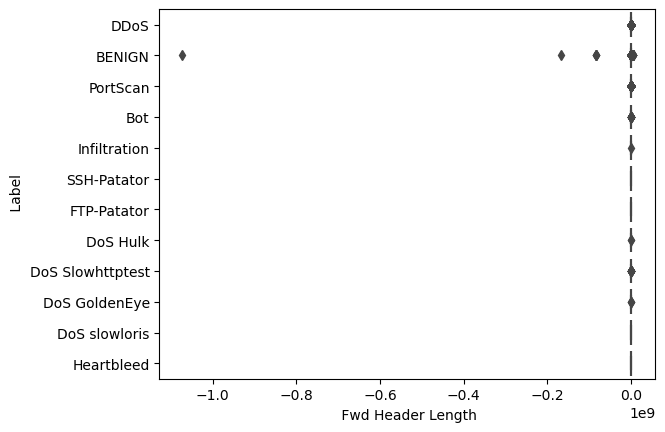

-2021.4006514285713
4524100


In [30]:
import seaborn as sns
sns.boxplot(x=" Fwd Header Length",y=" Label",data=df_new)
plt.show()
print(df_new[" Fwd Header Length"].mean())
print(df_new[" Fwd Header Length"].max())

In [31]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Fwd Header Length"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Fwd Header Length"].quantile(0.75)  # 3. çeyrek
IQR_FwdHeaderLength = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_FwdHeaderLength = Q1 - (0.6666* IQR_FwdHeaderLength)
ust_limit_FwdHeaderLength = Q3 + (10 * IQR_FwdHeaderLength)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength}")



Alt Limit: 0.0040000000000048885
Üst Limit: 700.0


In [32]:
ust_limit_FwdHeaderLength = min(ust_limit_FwdHeaderLength, 150)  # Maksimum 150 bayt ile sınırlandır


In [33]:
alt_limit_FwdHeaderLength = max(alt_limit_FwdHeaderLength, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_FwdHeaderLength}")


Güncellenmiş Alt Limit: 0.0040000000000048885


In [34]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength}")

Alt Limit: 0.0040000000000048885
Üst Limit: 150


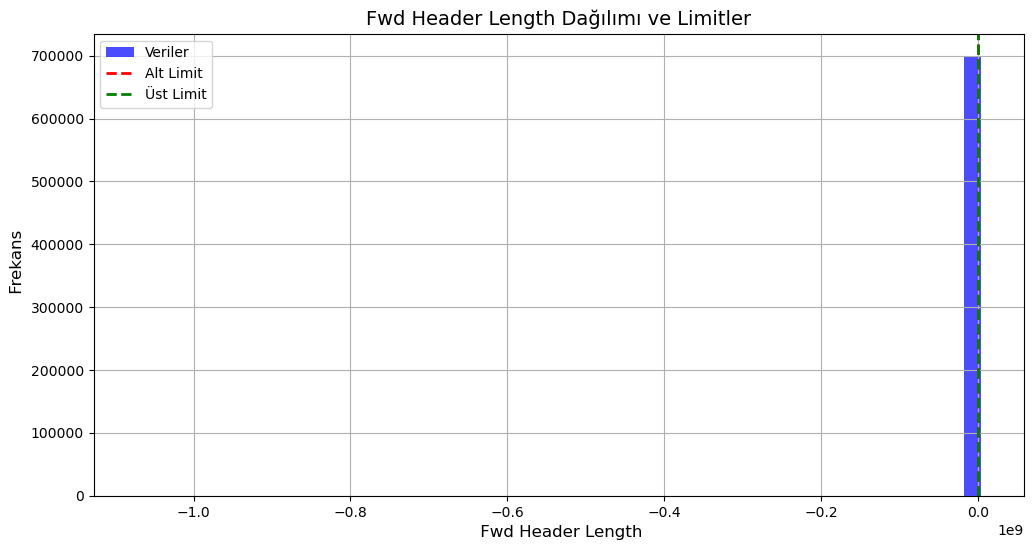

In [35]:
import matplotlib.pyplot as plt

# Verileri histogram olarak görselleştirin
plt.figure(figsize=(12, 6))
plt.hist(df_new[" Fwd Header Length"], bins=50, color='blue', alpha=0.7, label="Veriler")

# Alt ve üst limit çizgileri
plt.axvline(x=alt_limit_FwdHeaderLength, color='red', linestyle='--', linewidth=2, label='Alt Limit')
plt.axvline(x=ust_limit_FwdHeaderLength, color='green', linestyle='--', linewidth=2, label='Üst Limit')

# Grafik başlıkları ve etiketler
plt.title("Fwd Header Length Dağılımı ve Limitler", fontsize=14)
plt.xlabel(" Fwd Header Length", fontsize=12)
plt.ylabel(" Frekans", fontsize=12)
plt.legend()
plt.grid(True)

# Grafiği göster
plt.show()


In [ ]:
# # IQR hesaplama (Standart Q1 ve Q3 kullanımı)
# Q1 = df_new[" Bwd Header Length"].quantile(0.25)  # 1. çeyrek
# Q3 = df_new[" Bwd Header Length"].quantile(0.75)  # 3. çeyrek
# IQR_BwdHeaderLength = Q3 - Q1  # IQR hesaplama
 
# # Alt ve üst sınırların belirlenmesi
# alt_limit_BwdHeaderLength = Q1 - (0.6666* IQR_BwdHeaderLength)
# ust_limit_BwdHeaderLength = Q3 + (10 * IQR_BwdHeaderLength)
 
# # Alt ve üst sınırların yazdırılması
# print(f"Alt Limit: {alt_limit_BwdHeaderLength}")
# print(f"Üst Limit: {ust_limit_BwdHeaderLength}")

In [36]:
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new[" Bwd Header Length"] = df_new[" Bwd Header Length"].replace([float('inf'), float('-inf')], np.nan)
print(df_new[" Bwd Header Length"].isna().sum())

0


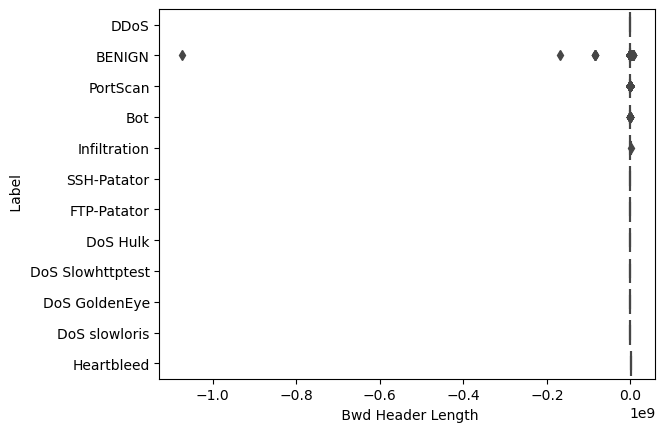

-1999.0211257142857
5678000


In [37]:
import seaborn as sns
sns.boxplot(x=" Bwd Header Length",y=" Label",data=df_new)
plt.show()
print(df_new[" Bwd Header Length"].mean())
print(df_new[" Bwd Header Length"].max())

In [38]:

# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Bwd Header Length"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Bwd Header Length"].quantile(0.75)  # 3. çeyrek
IQR_BwdHeaderLength = Q3 - Q1  # IQR hesaplama

# Alt ve üst sınırların belirlenmesi
alt_limit_BwdHeaderLength = max(Q1 - (1.5 * IQR_BwdHeaderLength), 0)  # Alt sınır (negatif olmamalı)
ust_limit_BwdHeaderLength = min(Q3 + (3 * IQR_BwdHeaderLength), 150)  # Üst sınır (150 ile sınırlandırılmış)

# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_BwdHeaderLength}")
print(f"Üst Limit: {ust_limit_BwdHeaderLength}")




Alt Limit: 0
Üst Limit: 150


In [39]:
ust_limit_BwdHeaderLength = min(ust_limit_BwdHeaderLength, 150)


In [40]:
alt_limit_BwdHeaderLength = max(alt_limit_BwdHeaderLength, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_BwdHeaderLength}")

Güncellenmiş Alt Limit: 0


In [41]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_BwdHeaderLength}")
print(f"Üst Limit: {ust_limit_BwdHeaderLength}")
 

Alt Limit: 0
Üst Limit: 150


In [42]:
# Alt ve üst sınırları aşan verileri filtreleme
filtered_data = df_new[
    (df_new[" Bwd Header Length"] >= alt_limit_BwdHeaderLength) &
    (df_new[" Bwd Header Length"] <= ust_limit_BwdHeaderLength)
]

print(f"Filtrelenmiş veri setinin boyutu: {filtered_data.shape}")


Filtrelenmiş veri setinin boyutu: (582109, 79)


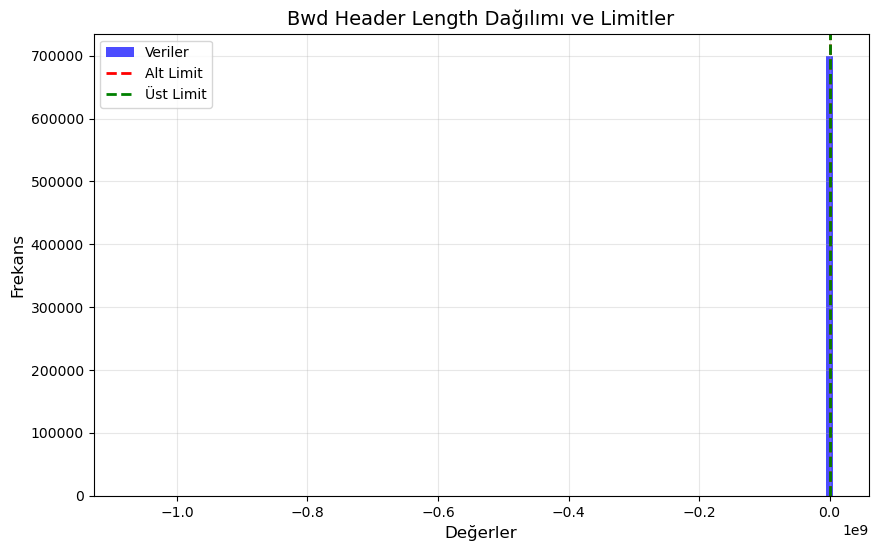

In [43]:
import matplotlib.pyplot as plt

# Veriyi al
data = df_new[" Bwd Header Length"]

# Histogram grafiği çiz
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='blue', alpha=0.7, label="Veriler")

# Alt ve üst limit çizgilerini ekle
plt.axvline(x=alt_limit_BwdHeaderLength, color='red', linestyle='--', linewidth=2, label="Alt Limit")
plt.axvline(x=ust_limit_BwdHeaderLength, color='green', linestyle='--', linewidth=2, label="Üst Limit")

# Grafiği düzenle
plt.title("Bwd Header Length Dağılımı ve Limitler", fontsize=14)
plt.xlabel("Değerler", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Grafiği göster
plt.show()


In [45]:
# # Sınıf bazlı alt ve üst limit belirleme
# unique_labels = df_new[" Label"].unique()
# for label in unique_labels:
#     label_data = df_new[df_new[" Label"] == label][" Bwd Header Length"]
#     Q1 = label_data.quantile(0.25)
#     Q3 = label_data.quantile(0.75)
#     IQR = Q3 - Q1
#     alt_limit = max(Q1 - (1.5 * IQR), 0)
#     ust_limit = min(Q3 + (3 * IQR), 150)
#     print(f"{label} Sınıfı - Alt Limit: {alt_limit}, Üst Limit: {ust_limit}")


DDoS Sınıfı - Alt Limit: 0, Üst Limit: 150
BENIGN Sınıfı - Alt Limit: 0, Üst Limit: 150
PortScan Sınıfı - Alt Limit: 20.0, Üst Limit: 20.0
Bot Sınıfı - Alt Limit: 0, Üst Limit: 150
Infiltration Sınıfı - Alt Limit: 0, Üst Limit: 150
SSH-Patator Sınıfı - Alt Limit: 0, Üst Limit: 150
FTP-Patator Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS Hulk Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS Slowhttptest Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS GoldenEye Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS slowloris Sınıfı - Alt Limit: 0, Üst Limit: 150
Heartbleed Sınıfı - Alt Limit: 65136.0, Üst Limit: 150


In [44]:
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new[" Fwd Header Length.1"] = df_new[" Fwd Header Length.1"].replace([float('inf'), float('-inf')], np.nan)
print(df_new[" Fwd Header Length.1"].isna().sum())

0


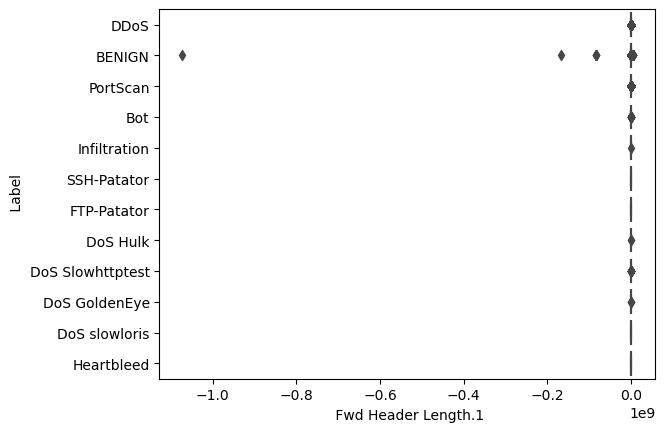

-2021.4006514285713
4524100


In [45]:
import seaborn as sns
sns.boxplot(x=" Fwd Header Length.1",y=" Label",data=df_new)
plt.show()
print(df_new[" Fwd Header Length.1"].mean())
print(df_new[" Fwd Header Length.1"].max())

In [46]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Fwd Header Length.1"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Fwd Header Length.1"].quantile(0.75)  # 3. çeyrek
IQR_FwdHeaderLength1 = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_FwdHeaderLength1 = Q1 - (0.6666* IQR_FwdHeaderLength1)
ust_limit_FwdHeaderLength1= Q3 + (10 * IQR_FwdHeaderLength1)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength1}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength1}")

Alt Limit: 0.0040000000000048885
Üst Limit: 700.0


In [47]:
alt_limit_FwdHeaderLength1 = max(0, alt_limit_FwdHeaderLength1)


In [48]:
ust_limit_FwdHeaderLength1 = min(ust_limit_FwdHeaderLength1, 150)


In [49]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength1}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength1}")

Alt Limit: 0.0040000000000048885
Üst Limit: 150


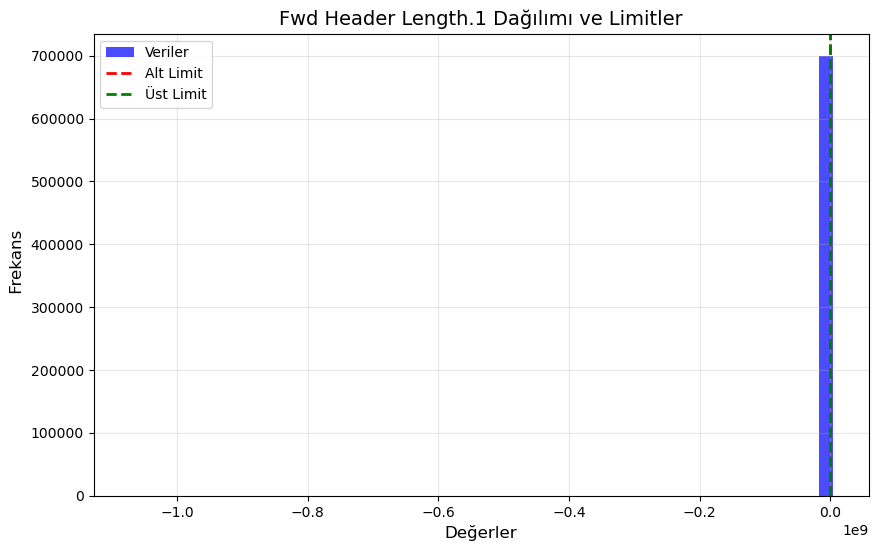

In [50]:
import matplotlib.pyplot as plt

# Veriyi ve limitleri görselleştirmek için histogram
plt.figure(figsize=(10, 6))
plt.hist(df_new[" Fwd Header Length.1"], bins=50, color='blue', alpha=0.7, label='Veriler')

# Alt ve üst limitleri dikey çizgilerle göster
plt.axvline(x=alt_limit_FwdHeaderLength1, color='red', linestyle='--', linewidth=2, label='Alt Limit')
plt.axvline(x=ust_limit_FwdHeaderLength1, color='green', linestyle='--', linewidth=2, label='Üst Limit')

# Grafik başlık ve etiketleri
plt.title("Fwd Header Length.1 Dağılımı ve Limitler", fontsize=14)
plt.xlabel("Değerler", fontsize=12)
plt.ylabel(" Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [51]:
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new[" Subflow Bwd Bytes"] = df_new[" Subflow Bwd Bytes"].replace([float('inf'), float('-inf')], np.nan)
print(df_new[" Subflow Bwd Bytes"].isna().sum())

0


In [52]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Subflow Bwd Bytes"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Subflow Bwd Bytes"].quantile(0.75)  # 3. çeyrek
IQR_SubflowBwdBytes = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_SubflowBwdBytes = Q1 - (0.6666* IQR_SubflowBwdBytes)
ust_limit_SubflowBwdBytes= Q3 + (3 * IQR_SubflowBwdBytes)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_SubflowBwdBytes}")
print(f"Üst Limit: {ust_limit_SubflowBwdBytes}")

Alt Limit: -265.9728
Üst Limit: 1638.0


In [53]:
alt_limit_SubflowBwdBytes = max(alt_limit_SubflowBwdBytes, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_SubflowBwdBytes}")

Güncellenmiş Alt Limit: 0


In [54]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_SubflowBwdBytes}")
print(f"Üst Limit: {ust_limit_SubflowBwdBytes}")
 

Alt Limit: 0
Üst Limit: 1638.0


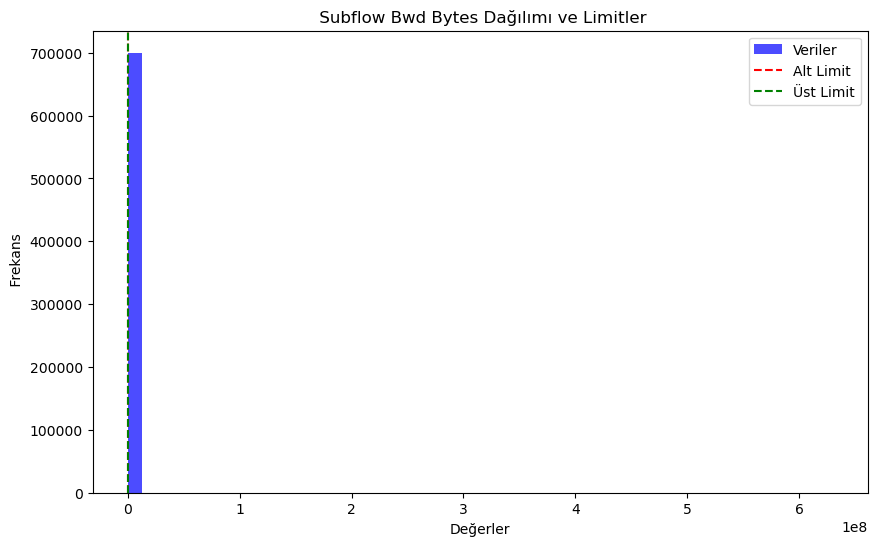

In [55]:
import matplotlib.pyplot as plt

# Histogram grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.hist(df_new[" Subflow Bwd Bytes"], bins=50, color='blue', alpha=0.7, label="Veriler")

# Alt ve üst limitleri göstermek için çizgiler ekleyin
plt.axvline(x=alt_limit_SubflowBwdBytes, color='red', linestyle='--', label='Alt Limit')
plt.axvline(x=ust_limit_SubflowBwdBytes, color='green', linestyle='--', label='Üst Limit')

plt.title(" Subflow Bwd Bytes Dağılımı ve Limitler")
plt.xlabel("Değerler")
plt.ylabel(" Frekans")
plt.legend()
plt.show()


In [56]:
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new[" min_seg_size_forward"] = df_new[" min_seg_size_forward"].replace([float('inf'), float('-inf')], np.nan)
print(df_new[" min_seg_size_forward"].isna().sum())

0


In [57]:
#min_seg_size_forward (minimum segment size forward), ağ trafiği analizinde bir bağlantı sırasında ileri yönlü (forward) veri paketlerinin
#minimum segment boyutunu ifade eder. Bu değer, bir veri bağlantısındaki paketlerin segment boyutlarının alt sınırını ölçmek için kullanılır.
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" min_seg_size_forward"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" min_seg_size_forward"].quantile(0.75)  # 3. çeyrek
IQR_min_seg_size_forward = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_min_seg_size_forward = Q1 - (1.65* IQR_min_seg_size_forward)
ust_limit_min_seg_size_forward= Q3 + (10 * IQR_min_seg_size_forward)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_min_seg_size_forward}")
print(f"Üst Limit: {ust_limit_min_seg_size_forward}")

Alt Limit: 0.20000000000000284
Üst Limit: 152.0


In [58]:
alt_limit_min_seg_size_forward = 0
print(f"Güncellenmiş Alt Limit: {alt_limit_min_seg_size_forward}")


Güncellenmiş Alt Limit: 0


In [59]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_min_seg_size_forward}")
print(f"Üst Limit: {ust_limit_min_seg_size_forward}")
 

Alt Limit: 0
Üst Limit: 152.0


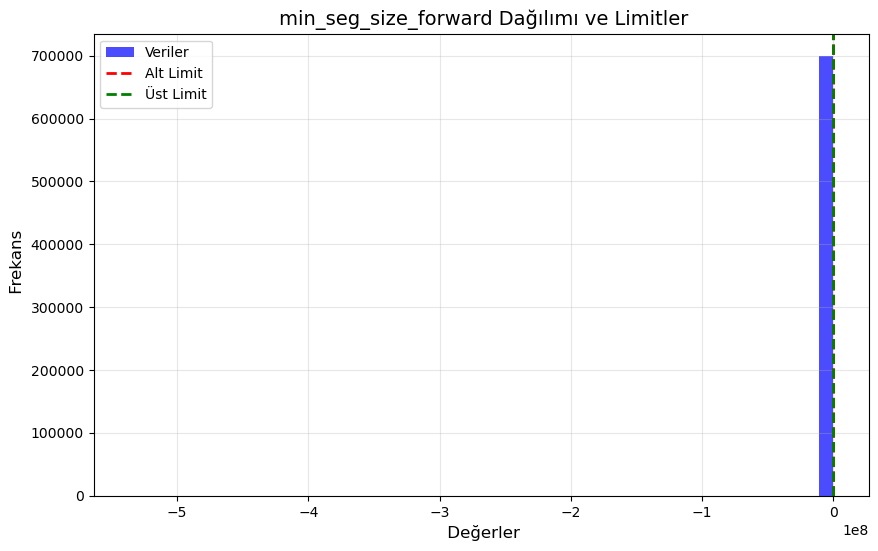

In [60]:
import matplotlib.pyplot as plt

# Histogram çizimi
plt.figure(figsize=(10, 6))
plt.hist(df_new[" min_seg_size_forward"], bins=50, color="blue", alpha=0.7, label="Veriler")

# Alt ve üst limitleri göster
plt.axvline(x=alt_limit_min_seg_size_forward, color="red", linestyle="--", linewidth=2, label="Alt Limit")
plt.axvline(x=ust_limit_min_seg_size_forward, color="green", linestyle="--", linewidth=2, label="Üst Limit")

# Grafiği özelleştir
plt.title(" min_seg_size_forward Dağılımı ve Limitler", fontsize=14)
plt.xlabel(" Değerler", fontsize=12)
plt.ylabel(" Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Grafiği göster
plt.show()


In [51]:
# BURAYA KADAR NELER YAPTIK?

# 1. Veri Birleştirme ve Ön İşleme
# Farklı veri setlerini birleştirip örnekleme yaparak işlem hacmini optimize edildi. Bu, büyük veri setleriyle çalışırken performans açısından önemlidir.
# Eksik ve aykırı değer kontrolü yapıldı ve bu değerlerle ilgili çeşitli çözümler uygulandı (örn. NaN değerleri doldurma ve negatif değerleri eleme).
# Bu adımlar veri setini model eğitimi için daha sağlam bir hale getirmiştir.

# 2. Aykırı Değer Analizi
# Aykırı değerler için IQR (Interquartile Range) yöntemi kullanıldı ve alt/üst limitler belirlendi.
# Aykırı değerlerin farklı sütunlarda dağılımını analiz ederek bu değerlerin sınıflandırma modeli üzerindeki potansiyel etkilerini anlamaya çalışıldı.
# Özellikle ağ verileri gibi kritik senaryolarda aykırı değer analizi, normal ve anormal durumları ayırt etmek için büyük önem taşır.

# 3. Özellik Bazlı İnceleme
# "Flow Bytes/s", "Subflow Bwd Bytes", "Fwd Header Length" gibi özellikler detaylı bir şekilde analiz edildi.
# Histogram ve dağılım grafiklerini kullanarak verilerin sınırlarının uygun olup olmadığını görselleştirdik. Bu, veriyi daha iyi anlamanızı sağladı.

# 4. Sınırların Belirlenmesi
# Her bir özellik için alt ve üst limitler sistematik olarak belirlendi. Bu limitler, veri temizleme ve normalizasyon aşamalarına katkı sağladı.
# Limitlerin manuel olarak incelemesi ve görsel doğrulama yapılması, projeye detaylı bir yaklaşım kazandırmıştır.

# 5. Görselleştirme
# Grafiksel analiz ile verinin sınırları ve dağılımı daha iyi anlaşıldı.
# Histogramlar, veri dağılımını anlamak için önemli bir araç olarak kullanıldı ve kodun modüler yapısı, her özellik için yeniden kullanılabilir hale getirildi.

In [61]:
# Veri çerçevesindeki tüm sütunları listele
print(df_new.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [62]:
df_temizlenmis = df_new[
    ((df_new[" min_seg_size_forward"] >= alt_limit_min_seg_size_forward) & (df_new[" min_seg_size_forward"] <= ust_limit_min_seg_size_forward)) &
    ((df_new[" Subflow Bwd Bytes"] >= alt_limit_SubflowBwdBytes) & (df_new[" Subflow Bwd Bytes"] <= ust_limit_SubflowBwdBytes)) &
    ((df_new[" Fwd Header Length.1"] >= alt_limit_FwdHeaderLength1) & (df_new[" Fwd Header Length.1"] <= ust_limit_FwdHeaderLength1)) &
    ((df_new[" Bwd Header Length"] >= alt_limit_BwdHeaderLength) & (df_new[" Bwd Header Length"] <= ust_limit_BwdHeaderLength)) &
    ((df_new[" Fwd Header Length"] >= alt_limit_FwdHeaderLength) & (df_new[" Fwd Header Length"] <= ust_limit_FwdHeaderLength)) &
    ((df_new["Flow Bytes/s"] >= alt_limit_FlowBytes) & (df_new["Flow Bytes/s"] <= ust_limit_FlowBytes)) &
    ((df_new[" Total Length of Bwd Packets"] >= alt_limit_TotalLengthofBwdPackets) & (df_new[" Total Length of Bwd Packets"] <= ust_limit_TotalLengthofBwdPackets))
]

In [63]:
# Sadece aykırı değerleri seçme
remaining_outliers = df_temizlenmis[
    (df_new[" min_seg_size_forward"] < alt_limit_min_seg_size_forward) | (df_new[" min_seg_size_forward"] > ust_limit_min_seg_size_forward) |
    (df_new[" Subflow Bwd Bytes"] < alt_limit_SubflowBwdBytes) | (df_new[" Subflow Bwd Bytes"] > ust_limit_SubflowBwdBytes) |
    (df_new[" Fwd Header Length.1"] < alt_limit_FwdHeaderLength1) | (df_new[" Fwd Header Length.1"] > ust_limit_FwdHeaderLength1) |
    (df_new[" Bwd Header Length"] < alt_limit_BwdHeaderLength) | (df_new[" Bwd Header Length"] > ust_limit_BwdHeaderLength) |
    (df_new[" Fwd Header Length"] < alt_limit_FwdHeaderLength) | (df_new[" Fwd Header Length"] > ust_limit_FwdHeaderLength) |
    (df_new["Flow Bytes/s"] < alt_limit_FlowBytes) | (df_new["Flow Bytes/s"] > ust_limit_FlowBytes) |
    (df_new[" Total Length of Bwd Packets"] < alt_limit_TotalLengthofBwdPackets) | (df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets)
]

print("Kalan aykırı değerler:")
print(remaining_outliers)

Kalan aykırı değerler:
Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Bwd PSH Flags,  Fwd URG Flags,  Bwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  CWE Flag Count,  ECE Flag Count,  Down/Up

C:\Users\dursu\AppData\Local\Temp\ipykernel_21596\385409549.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  remaining_outliers = df_temizlenmis[


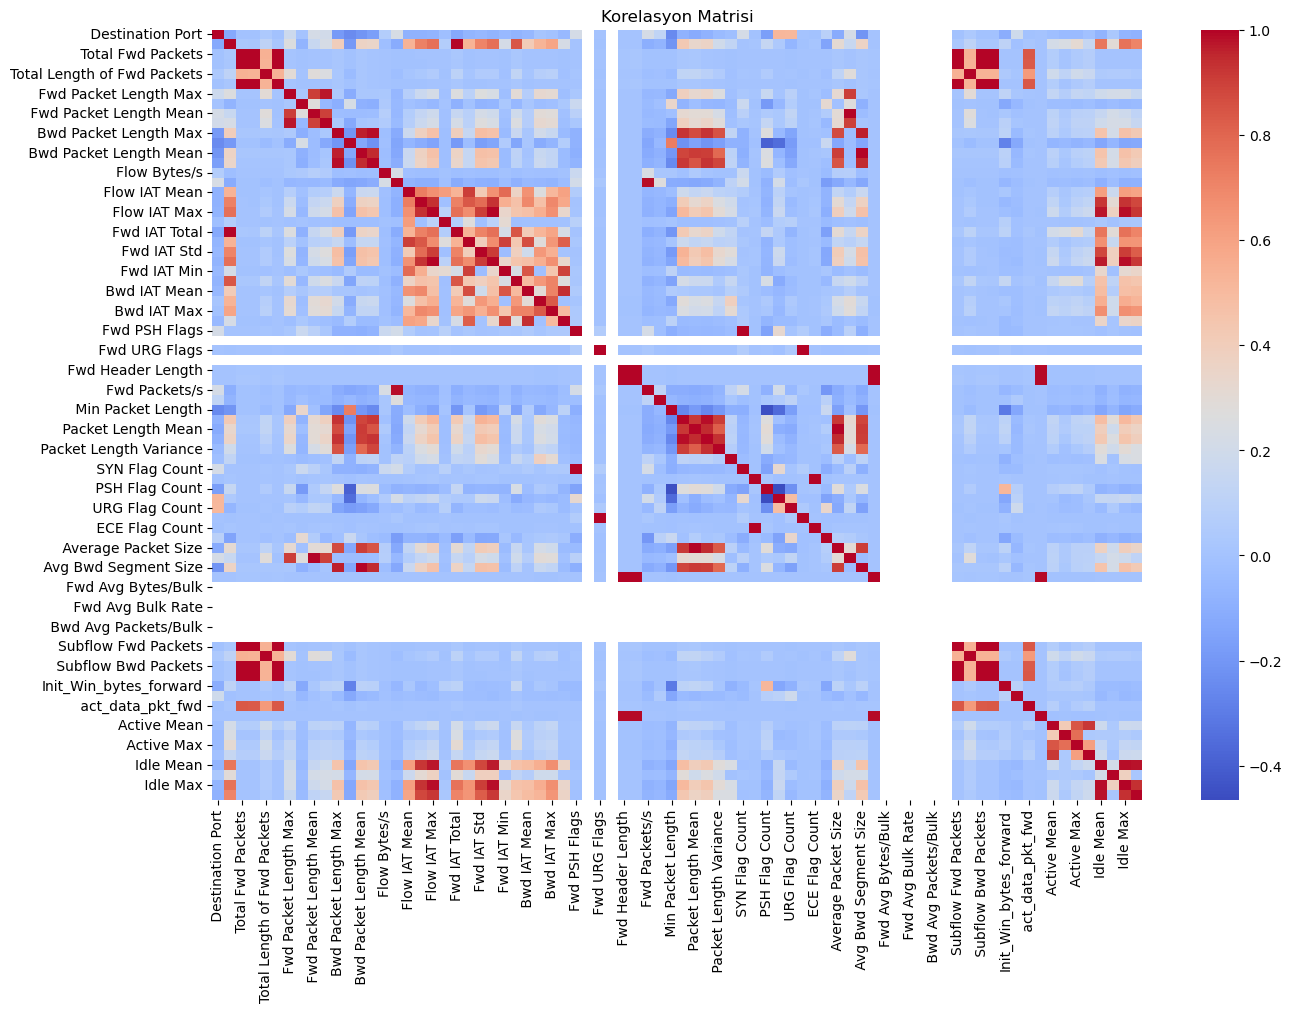

In [64]:
# Sadece sayısal sütunları seçin
numeric_columns = df_new.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_new[numeric_columns].corr()

# Korelasyon grafiği oluşturun
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [65]:
high_correlation = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1.0)]
print(high_correlation)


                              Destination Port   Flow Duration  \
 Destination Port                          NaN             NaN   
 Flow Duration                             NaN             NaN   
 Total Fwd Packets                         NaN             NaN   
 Total Backward Packets                    NaN             NaN   
Total Length of Fwd Packets                NaN             NaN   
...                                        ...             ...   
 Active Min                                NaN             NaN   
Idle Mean                                  NaN             NaN   
 Idle Std                                  NaN             NaN   
 Idle Max                                  NaN             NaN   
 Idle Min                                  NaN             NaN   

                              Total Fwd Packets   Total Backward Packets  \
 Destination Port                           NaN                      NaN   
 Flow Duration                              NaN        

In [66]:
# Sadece sayısal sütunları seçin
numeric_columns = df_new.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df_new[numeric_columns]

# Eşik değeri belirleme (örneğin 0.95)
threshold = 0.95

# Korelasyon matrisini elde et
correlation_matrix = numeric_df.corr()

# Üst üçgeni alarak çiftleri filtreleme
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Eşik değeri geçen çiftleri filtrele
high_correlation_pairs = upper_triangle.stack().reset_index()
high_correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[
    high_correlation_pairs['Correlation'].abs() > threshold
]

# Yüksek korelasyon gösteren çiftleri yazdır
print("Eşik değerini geçen yüksek korelasyonlu çiftler:")
print(high_correlation_pairs)


Eşik değerini geçen yüksek korelasyonlu çiftler:
                          Feature1                      Feature2  Correlation
87                   Flow Duration                 Fwd IAT Total     0.998291
137              Total Fwd Packets        Total Backward Packets     0.999642
139              Total Fwd Packets   Total Length of Bwd Packets     0.999207
188              Total Fwd Packets           Subflow Fwd Packets     1.000000
190              Total Fwd Packets           Subflow Bwd Packets     0.999642
191              Total Fwd Packets             Subflow Bwd Bytes     0.999199
205         Total Backward Packets   Total Length of Bwd Packets     0.999333
254         Total Backward Packets           Subflow Fwd Packets     0.999642
256         Total Backward Packets           Subflow Bwd Packets     1.000000
257         Total Backward Packets             Subflow Bwd Bytes     0.999325
320    Total Length of Fwd Packets             Subflow Fwd Bytes     1.000000
383    Total Le

In [67]:
# features_to_remove listesindeki mevcut sütunları kontrol et ve yalnızca mevcut olanları seç
features_to_remove = [
    'Subflow Fwd Packets',  # Örnek sütun
    ' Fwd Packet Length Mean',  # Örnek sütun
    ' Avg Fwd Segment Size',  # Örnek sütun
    ' Idle Min',  # Örnek sütun
    ' Flow IAT Total'  # Örnek sütun
]

# Veri çerçevesindeki mevcut sütunları seç
features_to_remove_filtered = [col for col in features_to_remove if col in df_new.columns]

# Mevcut sütunları kaldır
df_selected = df_new.drop(columns=features_to_remove_filtered)

# Kaldırılan sütunları ve kalan sütunları yazdır
print("Kaldırılan sütunlar:", features_to_remove_filtered)
print("Kalan sütunlar:", df_selected.columns)


Kaldırılan sütunlar: ['Subflow Fwd Packets', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Idle Min']
Kalan sütunlar: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pack

In [68]:
print(df_temizlenmis[" Label"].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'FTP-Patator'
 'SSH-Patator' 'DoS Hulk' 'DoS slowloris' 'DoS Slowhttptest']


In [69]:
print(df_temizlenmis[" Label"].value_counts())

 Label
BENIGN              312068
PortScan             54793
DoS Hulk              1508
DDoS                  1164
Bot                    689
FTP-Patator            619
DoS slowloris          109
DoS Slowhttptest        33
SSH-Patator              6
Infiltration             1
Name: count, dtype: int64


In [70]:
numeric_columns =df_temizlenmis.select_dtypes(include=['int64', 'float64']).columns


print("\nSayısal Sütunlar:", list(numeric_columns))


Sayısal Sütunlar: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag 

In [71]:
import numpy as np

# Sadece sayısal sütunları seç
numeric_columns = df_temizlenmis.select_dtypes(include=[np.number])

# Sonsuz değer içeren sütunları bul
infinity_columns = numeric_columns.columns[np.isinf(numeric_columns).any()].tolist()

# Sonsuz değer içeren sütunları yazdır
if infinity_columns:
    print("Sonsuz (Infinity) değer içeren sütunlar:")
    print(infinity_columns)
else:
    print("Veride sonsuz (Infinity) değer içeren sütun bulunamadı.")


Sonsuz (Infinity) değer içeren sütunlar:
[' Flow Packets/s']


In [72]:
import numpy as np

# Sonsuz değerleri NaN ile değiştir
df_temizlenmis.loc[:, " Flow Packets/s"] = df_temizlenmis[" Flow Packets/s"].replace(
    [float('inf'), float('-inf')], np.nan
)

# NaN değerleri sütunun ortalamasıyla doldur
df_temizlenmis.loc[:, " Flow Packets/s"] = df_temizlenmis[" Flow Packets/s"].fillna(
    df_temizlenmis[" Flow Packets/s"].mean()
)

# NaN değerlerin olmadığını kontrol et
print("NaN değer sayısı:", df_temizlenmis[" Flow Packets/s"].isna().sum())


NaN değer sayısı: 0


In [73]:
df_temizlenmis[" Flow Packets/s"]=df_temizlenmis[" Flow Packets/s"].fillna(df_temizlenmis[" Flow Packets/s"].mean())
print(df_temizlenmis[" Flow Packets/s"].isna().sum())

0


C:\Users\dursu\AppData\Local\Temp\ipykernel_21596\1841054293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temizlenmis[" Flow Packets/s"]=df_temizlenmis[" Flow Packets/s"].fillna(df_temizlenmis[" Flow Packets/s"].mean())


In [74]:
from sklearn.preprocessing import MinMaxScaler
Normalizasyon_Columns=[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
                       'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', 
                       ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max',
                       ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', 
                       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
                       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', 
                       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', 
                       ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
                       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', 
                       ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', 
                       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', 
                       ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1',
                       'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
                       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', 
                       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
                       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min',
                       'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']
scaler=MinMaxScaler()
df_temizlenmis[Normalizasyon_Columns]=scaler.fit_transform(df_temizlenmis[Normalizasyon_Columns])
print(df_temizlenmis.isnull().sum())

C:\Users\dursu\AppData\Local\Temp\ipykernel_21596\2350181657.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temizlenmis[Normalizasyon_Columns]=scaler.fit_transform(df_temizlenmis[Normalizasyon_Columns])


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [75]:
print(df_temizlenmis.head())

     Destination Port   Flow Duration   Total Fwd Packets  \
8            0.000793        0.000519            0.000000   
24           0.000793        0.001329            0.043478   
32           0.006745        0.072949            0.173913   
55           0.001205        0.002081            0.000000   
57           0.764546        0.001506            0.217391   

     Total Backward Packets  Total Length of Fwd Packets  \
8                  0.142857                     0.004554   
24                 0.285714                     0.004940   
32                 0.857143                     0.021534   
55                 0.142857                     0.000463   
57                 0.285714                     0.895878   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
8                       0.045816                0.005088   
24                      0.124618                0.002760   
32                      0.114844                0.018629   
55                      0.003665

In [76]:
df_temizlenmis = df_new  

# 'Label' sütununu 'Normal' ve 'Anomali' olarak yeniden sınıflandır
df_temizlenmis[' Label'] = df_temizlenmis[' Label'].apply(
    lambda x: 'Normal' if x == 'BENIGN' else 'Anomali'  # Şartlı atama
)

# Yeni sınıf dağılımını yazdır
print("Yeni Sınıf Dağılımı:")
print(df_temizlenmis[' Label'].value_counts())


Yeni Sınıf Dağılımı:
 Label
Normal     547335
Anomali    152665
Name: count, dtype: int64


In [77]:
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
df_temizlenmis[" Label"]=Label_encoder.fit_transform(df_temizlenmis[" Label"])
print(df_temizlenmis[" Label"].head)
print(df_temizlenmis[" Label"].value_counts())

<bound method NDFrame.head of 0         0
1         1
2         1
3         0
4         1
         ..
699995    1
699996    1
699997    0
699998    0
699999    0
Name:  Label, Length: 700000, dtype: int32>
 Label
1    547335
0    152665
Name: count, dtype: int64


In [78]:
# "Anomali" sınıfını seç
anomali = df_temizlenmis[df_temizlenmis[' Label'] == 0]

# Gerekli örnek sayısını hesapla
needed_samples = len(df_temizlenmis[df_temizlenmis[' Label'] == 1]) - len(anomali)

# Gerekli örnek sayısını kontrol et
if needed_samples > 0:
    # Gerekli örnekleri çoğalt (replace=True ile)
    anomaly_duplicated = anomali.sample(n=needed_samples, replace=True, random_state=42)
    
    # Veri setlerini birleştir
    df_temizlenmis = pd.concat([df_temizlenmis, anomaly_duplicated], axis=0).reset_index(drop=True)
    
    # Sonuçları kontrol et
    print("Yeni veri setindeki sınıf dağılımı:")
    print(df_temizlenmis[' Label'].value_counts())


Yeni veri setindeki sınıf dağılımı:
 Label
0    547335
1    547335
Name: count, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (özellikler) ve hedef değişkeni ayırma
X = df_temizlenmis.drop(columns=[" Label"])  # 'Label' sütunu hedef değişken
y = df_temizlenmis[" Label"]  # Hedef değişken

# Eğitim ve test setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim ve test seti başarıyla bölündü.")


Eğitim ve test seti başarıyla bölündü.


In [80]:
import numpy as np

print("Eksik değer sayısı:", X_train.isna().sum().sum())
print("Sonsuz değer var mı?:", np.isinf(X_train).values.any())


Eksik değer sayısı: 0
Sonsuz değer var mı?: True


In [81]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # İlk olarak sonsuz değerleri NaN ile değiştir
X_train = X_train.fillna(X_train.mean())  # NaN değerleri sütunların ortalama değeriyle doldur



In [82]:
import numpy as np

print("Eksik değer sayısı:", X_train.isna().sum().sum())
print("Sonsuz değer var mı?:", np.isinf(X_train).values.any())

Eksik değer sayısı: 0
Sonsuz değer var mı?: False


In [83]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# import numpy as np


# # Hiperparametre arama alanı
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [5, 10],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt'],
#     'bootstrap': [True]
# }

# # Random Forest model nesnesi
# rf = RandomForestClassifier(random_state=42)

# # GridSearchCV
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=3,
#     scoring='accuracy',
#     n_jobs=-1
# )

# # GridSearch uygulaması
# grid_search.fit(X_train, y_train)

# # En iyi parametreler
# best_params = grid_search.best_params_
# print("En iyi parametreler:", best_params)

#MEMORY HATASINDAN DOLAYI PARAMETRELER AZALTILDI.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Küçültülmüş hiperparametre arama alanı
param_grid = {
    'n_estimators': [100],  # Daha az ağaç
    'max_depth': [10],  # Sadece 10 derinliği denenecek
    'min_samples_split': [5],  # Daha az seçenek
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],  # Tek bir özellik seçimi
    'bootstrap': [True]  # Sadece bootstrap denenecek
}

# Eğitim ve test verilerinin ayrılması
X_train_sampled = X_train.sample(n=50000, random_state=42)  # Daha az veri kullan
y_train_sampled = y_train[X_train_sampled.index]

# Random Forest model nesnesi
rf = RandomForestClassifier(random_state=42)

# GridSearchCV nesnesi
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # Cross-validation sayısını düşük tuttuk
    scoring='accuracy',
    n_jobs=-1  # Paralel işlem
)

# GridSearch uygulaması
print("GridSearch başlatılıyor...")
grid_search.fit(X_train_sampled, y_train_sampled)

# En iyi parametreler
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)



GridSearch başlatılıyor...
En iyi parametreler: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# best_rf = RandomForestClassifier(
#     bootstrap=True,
#     max_depth=10,
#     max_features='sqrt',
#     min_samples_leaf=1,
#     min_samples_split=5,
#     n_estimators=100,
#     random_state=42
# )
# best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [85]:
import numpy as np
import pandas as pd

# Sonsuzluk ve NaN değerlerini kontrol et
print("Sonsuz değer sayısı:", np.isinf(X_test).sum().sum())
print("NaN değer sayısı:", X_test.isna().sum().sum())


Sonsuz değer sayısı: 201
NaN değer sayısı: 0


In [86]:
X_test = X_test.replace([np.inf, -np.inf], np.nan)


In [87]:
X_test = X_test.fillna(X_test.mean())


In [88]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# # Tahminler
# y_pred = best_rf.predict(X_test)
# y_prob = best_rf.predict_proba(X_test)[:, 1]

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # ROC AUC Score
# roc_auc = roc_auc_score(y_test, y_prob)
# print("ROC AUC Score:", roc_auc)

# # Classification Report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Confusion Matrix:
[[109000    467]
 [   304 109163]]
ROC AUC Score: 0.9998285134883533
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    109467
           1       1.00      1.00      1.00    109467

    accuracy                           1.00    218934
   macro avg       1.00      1.00      1.00    218934
weighted avg       1.00      1.00      1.00    218934



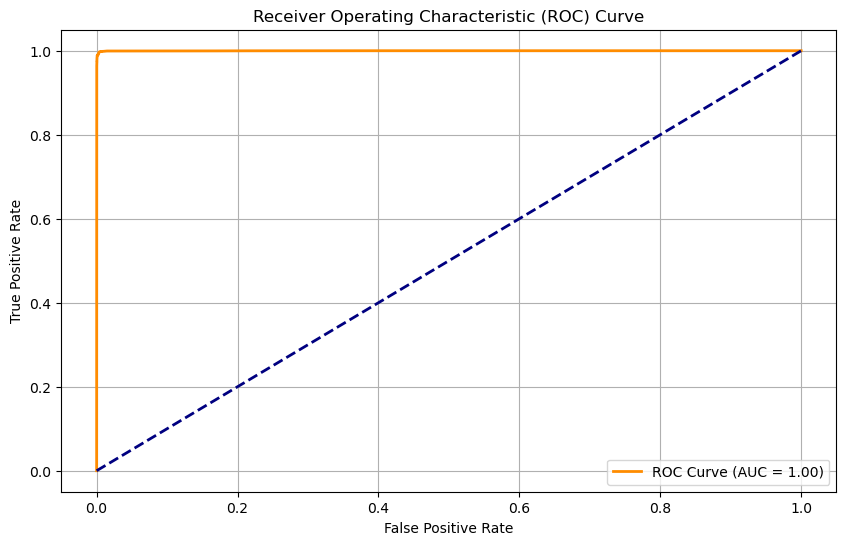

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Pozitif sınıfın olasılıklarını alıyoruz
# y_prob = best_rf.predict_proba(X_test)[:, 1]

# # ROC eğrisi hesaplama
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# # ROC eğrisini çizme
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.grid()
# plt.show()


In [107]:
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Tahminler
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc1 = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[107200   2267]
 [  1036 108431]]
ROC AUC Score: 0.9976576688996424
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    109467
           1       0.98      0.99      0.98    109467

    accuracy                           0.98    218934
   macro avg       0.98      0.98      0.98    218934
weighted avg       0.98      0.98      0.98    218934



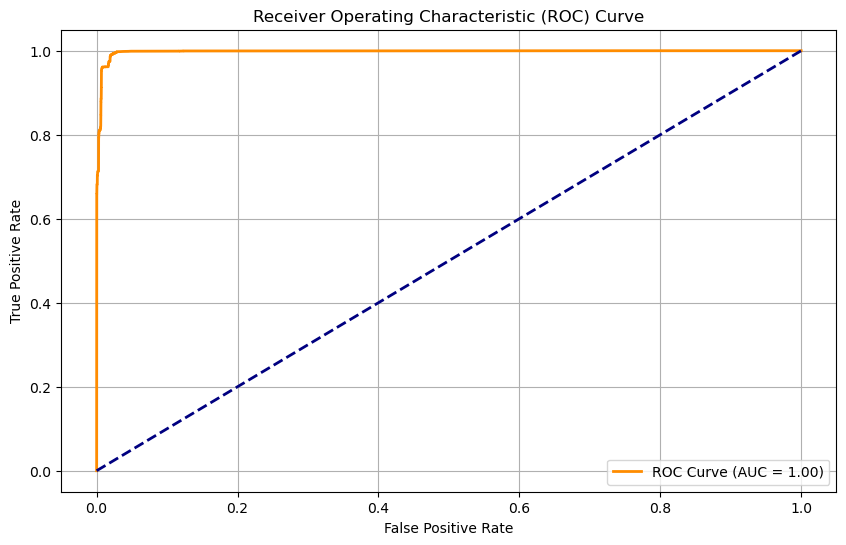

In [109]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Pozitif sınıfın olasılıklarını alıyoruz
y_prob = best_rf.predict_proba(X_test)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc1 = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [110]:
import numpy as np

# Sonsuz veya NaN değer içeren sütunları kontrol et
problematic_columns = X.columns[
    (np.isinf(X).any(axis=0)) | (np.isnan(X).any(axis=0))
].tolist()

if len(problematic_columns) > 0:
    print("Sorunlu sütunlar:", problematic_columns)
else:
    print("Veride sorunlu sütun yok.")


Veride sorunlu sütun yok.


In [111]:
# Sorunlu sütunlarda sonsuz ve NaN değerleri düzelt
X[problematic_columns] = X[problematic_columns].replace([np.inf, -np.inf], np.nan)
X[problematic_columns] = X[problematic_columns].fillna(X[problematic_columns].mean())


In [112]:
# Her sütunun maksimum ve minimum değerlerini yazdır
print("Maksimum değerler:\n", X.max())
print("Minimum değerler:\n", X.min())


Maksimum değerler:
  Destination Port                  65534.0
 Flow Duration                 119999998.0
 Total Fwd Packets                214125.0
 Total Backward Packets           283900.0
Total Length of Fwd Packets      2866110.0
                                  ...     
 Active Min                    107000000.0
Idle Mean                      120000000.0
 Idle Std                       76600000.0
 Idle Max                      120000000.0
 Idle Min                      120000000.0
Length: 78, dtype: float64
Minimum değerler:
  Destination Port               0.0
 Flow Duration                -12.0
 Total Fwd Packets              1.0
 Total Backward Packets         0.0
Total Length of Fwd Packets     0.0
                               ... 
 Active Min                     0.0
Idle Mean                       0.0
 Idle Std                       0.0
 Idle Max                       0.0
 Idle Min                       0.0
Length: 78, dtype: float64


In [113]:
# Sonsuz veya NaN değer olup olmadığını tekrar kontrol et
print("Sonsuz değer var mı:", np.isinf(X).values.any())
print("NaN değer var mı:", np.isnan(X).values.any())


Sonsuz değer var mı: False
NaN değer var mı: False


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Çapraz doğrulama için F1 skoru hesaplama
scorer = make_scorer(f1_score, average='weighted')

# Çapraz doğrulama
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring=scorer)

# Çapraz doğrulama sonuçlarını yazdırma
print("Cross-validation F1-scores:", cv_scores)
print("Average F1-score:", cv_scores.mean())


Cross-validation F1-scores: [0.99114317 0.97318032 0.98398078 0.98437801 0.98591262]
Average F1-score: 0.9837189782698124


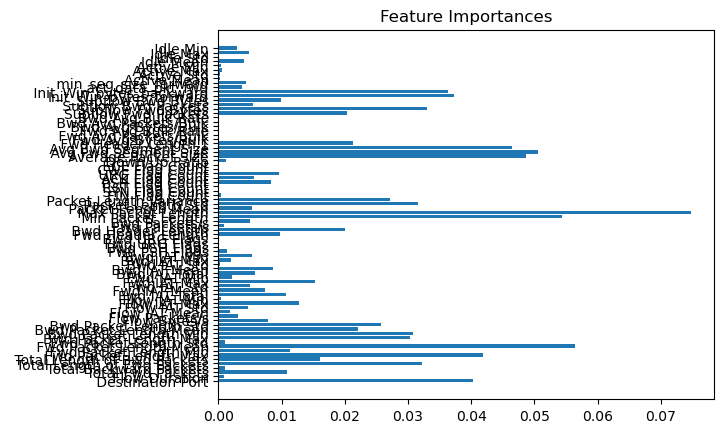

In [115]:
# Özellik önemlerini görselleştirin
import matplotlib.pyplot as plt

feature_importances = best_rf.feature_importances_
plt.barh(X.columns, feature_importances)
plt.title("Feature Importances")
plt.show()


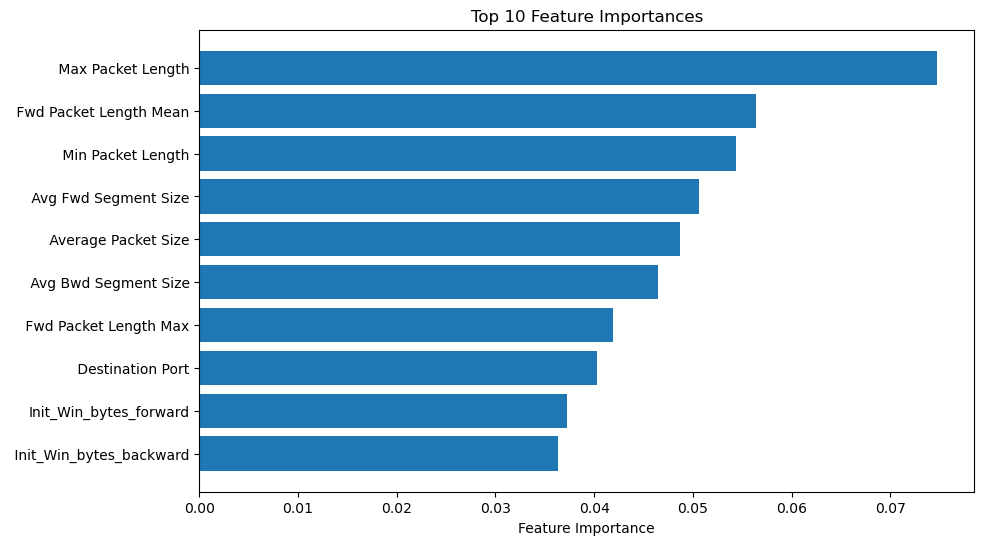

In [116]:
# En önemli 10 özelliği seçmek
import matplotlib.pyplot as plt
import pandas as pd

# Özellik önemlerini DataFrame'e çevir
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# İlk 10 özelliği seç
top_features = feature_importance_df.head(10)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Y eksenini ters çevir
plt.show()


In [117]:
import joblib

model = joblib.load('random_forest_model.pkl')
print(model)


RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       random_state=42)


In [118]:
import joblib

# Modeli kaydetme
joblib.dump(best_rf, 'random_forest_model.pkl')

# Kaydedilen modeli yükleme
model = joblib.load('random_forest_model.pkl')


In [104]:
import joblib

# Modeli yükle
model = joblib.load('random_forest_model.pkl')

# Eğitimde kullanılan özellik sayısını kontrol et
print(f"Modelin beklediği özellik sayısı: {model.n_features_in_}")


Modelin beklediği özellik sayısı: 78


In [ ]:
# from flask import Flask, request, jsonify, render_template
# import matplotlib.pyplot as plt
# import joblib
# import numpy as np
# import logging
# import warnings
# import seaborn as sns
# import io
# import base64

# # Uyarı mesajlarını bastırma
# warnings.filterwarnings("ignore", category=UserWarning)

# # Flask uygulamasını başlat
# app = Flask(__name__)

# # Loglama ayarları
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

# # Kaydedilen modeli yükle
# try:
#     model = joblib.load('random_forest_model.pkl')
#     logging.info("Model başarıyla yüklendi!")
# except FileNotFoundError:
#     logging.error("Model dosyası bulunamadı. Lütfen doğru dosya yolunu kontrol edin.")
#     model = None

# @app.route('/')
# def home():
#     """
#     Ana sayfayı render eden rota.
#     """
#     return render_template('index.html')  # templates/index.html dosyasını döndürür

# @app.route('/predict', methods=['POST'])
# def predict():
#     """
#     Bu fonksiyon, gelen JSON verisini alır, modeli kullanarak tahmin yapar
#     ve sonucu görselleştirir.
#     """
#     if model is None:
#         logging.error("Model yüklü değil!")
#         return jsonify({"error": "Model yüklenmedi. Lütfen kontrol edin."}), 500

#     try:
#         # İstekten JSON verisini al
#         data = request.get_json()

#         # Gelen veriyi kontrol et
#         if 'features' not in data:
#             logging.warning("Girdi verisinde 'features' anahtarı bulunamadı.")
#             return jsonify({"error": "Girdi verisinde 'features' anahtarı bulunamadı."}), 400

#         # Özellikleri numpy array formatına çevir
#         features = np.array(data['features']).reshape(1, -1)

#         # Modeli kullanarak tahmin yap
#         prediction = model.predict(features)
#         prediction_proba = model.predict_proba(features)  # Anomali olasılığı

#         logging.info(f"Tahmin yapıldı: {int(prediction[0])}, Olasılık: {prediction_proba.tolist()}")

#         # Görselleştirme için Matplotlib kullan
#         fig, ax = plt.subplots(figsize=(6, 4))
#         sns.barplot(
#             x=["Normal", "Anomaly"],
#             y=prediction_proba[0],
#             palette="coolwarm",
#             ax=ax
#         )
#         ax.set_title("Tahmin Sonuçlarının Olasılık Dağılımı")
#         ax.set_xlabel("Sınıf")
#         ax.set_ylabel("Olasılık")
#         plt.tight_layout()

#         # Grafiği base64 formatına çevir
#         buf = io.BytesIO()
#         plt.savefig(buf, format='png')
#         buf.seek(0)
#         image_base64 = base64.b64encode(buf.read()).decode('utf-8')
#         buf.close()

#         # Tahmin ve grafik sonuçlarını döndür
#         return jsonify({
#             "prediction": int(prediction[0]),
#             "probability": prediction_proba.tolist(),
#             "graph": image_base64  # Grafiği base64 olarak döndür
#         })
#     except Exception as e:
#         logging.error(f"Bir hata oluştu: {str(e)}")
#         return jsonify({"error": f"Bir hata oluştu: {str(e)}"}), 500

# if __name__ == '__main__':
#     logging.info("Flask uygulaması başlatılıyor...")
#     app.run(debug=True, host='0.0.0.0', port=5001)


2025-01-12 16:59:30,879 - Model başarıyla yüklendi!
2025-01-12 16:59:30,881 - Flask uygulaması başlatılıyor...


 * Serving Flask app '__main__'
 * Debug mode: on


2025-01-12 16:59:31,765 - WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://192.168.1.48:5001
2025-01-12 16:59:31,766 - Press CTRL+C to quit
2025-01-12 16:59:31,805 -  * Restarting with watchdog (windowsapi)


SystemExit: 1

In [82]:
#MODELİ SENTETİK OLARAK OLUŞTURDUĞUMUZ VERİ SETİYLE TEST ETTİK.
from sklearn.datasets import make_classification
import pandas as pd

#Yeni test verisi oluştur
X_test, y_test = make_classification(
     n_samples=500,  # 500 örnek
     n_features=78,  # 78 özellik
     n_informative=50,  # Bilgilendirici özellik sayısı
     n_redundant=10,  # Redundant (birbirini tekrar eden) özellik sayısı
     n_classes=2,  # İki sınıf
     random_state=42
)

# # Test verisini DataFrame olarak kaydet
test_data = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(78)])
test_data['Label'] = y_test  # Hedef değişkeni ekle

# # CSV olarak kaydet
test_data.to_csv("test_dataset.csv", index=False)
print("Sentetik test veri seti test_dataset.csv olarak kaydedildi.")


Sentetik test veri seti test_dataset.csv olarak kaydedildi.


In [83]:
import pandas as pd

# Test veri setini yükle
test_data = pd.read_csv("test_dataset.csv")

# Özellikler ve hedef değişkeni ayır
X_test = test_data.drop(columns=["Label"])
y_test = test_data["Label"]

print("Test veri seti yüklendi. Test verisi boyutu:", X_test.shape)


Test veri seti yüklendi. Test verisi boyutu: (500, 78)


In [84]:
import joblib

# Modeli yükle
model = joblib.load("random_forest_model.pkl")
print("Model başarıyla yüklendi.")


Model başarıyla yüklendi.


In [85]:
# Eğitim veri setinde kullanılan sütunlar
train_features = list(pd.read_csv("combined_dataset.csv").drop(columns=[" Label"]).columns)

# Test veri setindeki mevcut sütunları kontrol et
test_features = list(X_test.columns)

# Farklılıkları bulun
missing_in_test = set(train_features) - set(test_features)
extra_in_test = set(test_features) - set(train_features)

print("Eğitimde olup testte olmayan sütunlar:", missing_in_test)
print("Testte olup eğitimde olmayan sütunlar:", extra_in_test)


Eğitimde olup testte olmayan sütunlar: {'Idle Mean', 'Flow Bytes/s', ' RST Flag Count', ' Bwd Avg Packets/Bulk', ' Fwd Avg Packets/Bulk', 'FIN Flag Count', ' Packet Length Mean', 'Fwd Avg Bytes/Bulk', ' Bwd Packet Length Mean', 'Fwd Packets/s', 'Fwd PSH Flags', ' ECE Flag Count', ' ACK Flag Count', ' act_data_pkt_fwd', ' Max Packet Length', ' Bwd Packet Length Std', ' Bwd Packets/s', ' Packet Length Variance', ' Bwd Avg Bytes/Bulk', ' min_seg_size_forward', 'Bwd IAT Total', 'Subflow Fwd Packets', ' Fwd Packet Length Mean', ' Fwd Header Length.1', ' Bwd Packet Length Min', ' Flow Packets/s', ' Subflow Fwd Bytes', ' Avg Fwd Segment Size', ' Flow IAT Min', ' Total Length of Bwd Packets', ' URG Flag Count', ' Fwd URG Flags', ' Fwd Packet Length Std', ' Fwd Packet Length Min', ' Bwd IAT Std', ' Active Std', ' Idle Max', ' Bwd URG Flags', ' Fwd IAT Min', ' CWE Flag Count', ' Flow IAT Std', 'Init_Win_bytes_forward', ' Subflow Bwd Bytes', 'Bwd Packet Length Max', ' Subflow Bwd Packets', ' Bwd 

In [86]:
#Eksik sütunları doldur
for col in missing_in_test:
  X_test[col] = 0


In [87]:
#Fazla sütunları kaldır
X_test = X_test.drop(columns=list(extra_in_test), errors='ignore')


In [88]:
#Sütun sırasını düzenle
X_test = X_test[train_features]


In [ ]:
#Tahmin yap
y_pred = model.predict(X_test)

#Performansı değerlendirin
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[  0 247]
 [  0 253]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.51      1.00      0.67       253

    accuracy                           0.51       500
   macro avg       0.25      0.50      0.34       500
weighted avg       0.26      0.51      0.34       500



NameError: name 'accuracy_score' is not defined

In [117]:
# print(y_test.value_counts())


Label
1    253
0    247
Name: count, dtype: int64


In [ ]:
#Önce modelimizin doğruluğunu test etmek için sentetik veri seti ürettik.
#O veri setine doğrudan modelimizi uyguladığımızda hata paylarını çokca verdi.
#Şimdi de veri ön işleme adımlarını vs uygulayıp tekrar modelimizi test edeceğiz.

In [124]:
# print(X_test.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                  0               0                   0   
1                  0               0                   0   
2                  0               0                   0   
3                  0               0                   0   
4                  0               0                   0   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                 

In [119]:
# # Test veri setindeki ilk birkaç satırı inceleyin
# print(X_test.head())

# # Eksik değerleri kontrol edin
# print(X_test.isnull().sum())

# # Sütunların veri tiplerini kontrol edin
# print(X_test.dtypes)

# # Eğitim veri setindeki sütunlar ile test veri setini karşılaştırın
# print("Eğitim veri setindeki sütunlar: ", X_train.columns)
# print("Test veri setindeki sütunlar: ", X_test.columns)


    Destination Port   Flow Duration   Total Fwd Packets  \
0                  0               0                   0   
1                  0               0                   0   
2                  0               0                   0   
3                  0               0                   0   
4                  0               0                   0   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                 

In [120]:
# # Eksik değerleri kontrol edin
# print(X_test.isnull().sum())

# # Toplam eksik değer sayısını kontrol edin
# print("Toplam eksik değer:", X_test.isnull().sum().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64
Toplam eksik değer: 0


In [121]:
# # Z-skoru yöntemiyle uç değerleri kontrol edelim
# from scipy.stats import zscore

# z_scores = X_test.apply(zscore)
# outliers = (z_scores > 3).sum()

# print("Uç değer sayısı (her bir sütun için):")
# print(outliers)

# # Toplam uç değer sayısını kontrol et
# print("Toplam uç değer:", (z_scores > 3).sum().sum())


Uç değer sayısı (her bir sütun için):
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64
Toplam uç değer: 0
